# Feature Engineering
### Tolong baca perintah dan tagar komen dengan saksama :)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# Scalling untuk MinMax Scaller
from sklearn.preprocessing import MinMaxScaler
# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# B. Outlier Handling

### Outlier Handling : InterQuartile Handling

In [5]:
# untuk plot Q-Q
import scipy.stats as stats

In [6]:
path = '/content/california_dataset.csv'
df_california = pd.read_csv(path)

In [8]:
df_california.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  house_price  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [10]:
df_california.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'house_price'],
      dtype='object')

In [22]:

# splitting terlebih dahulu
from sklearn.model_selection import train_test_split
train_house, test_house = train_test_split(df_california, test_size = 0.2, random_state=42)

#NOTES :
#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)
#data train di-handling outliernya
#tapi tidak untuk data test, karena data test ibarat representasi data masa depan yang digunakan untuk melihat performa Machine Learning

### Assignment 1.a :
1. lakukan looping untuk melihat plot distribusi data dan outlier pada kolom-kolom : ['MedInc', 'HouseAge', 'AveRooms','AveBedrms', 'AveOccup'] di california_dataset.csv
2. Daftar nama kolom yang Anda cek, kolom_kolom = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup']

**Assignment 1.a Methode 1 Dengan Visualisasi:**

In [26]:
# Assignment 1.a : lakukan looping untuk melihat plot distribusi data dan outlier pada kolom-kolom : ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup'] di california_dataset.csv
# Daftar nama kolom yang ingin Anda cek
columns_to_check = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

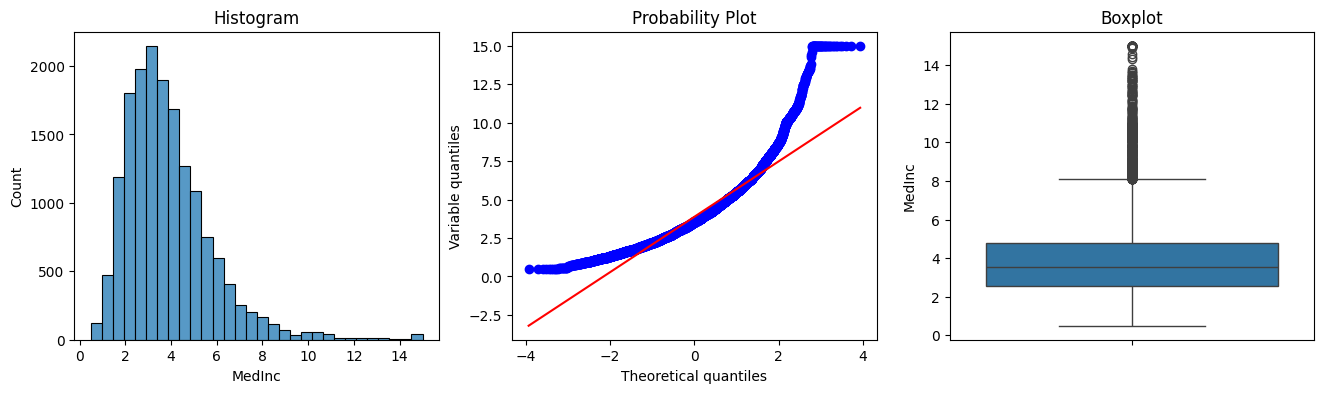

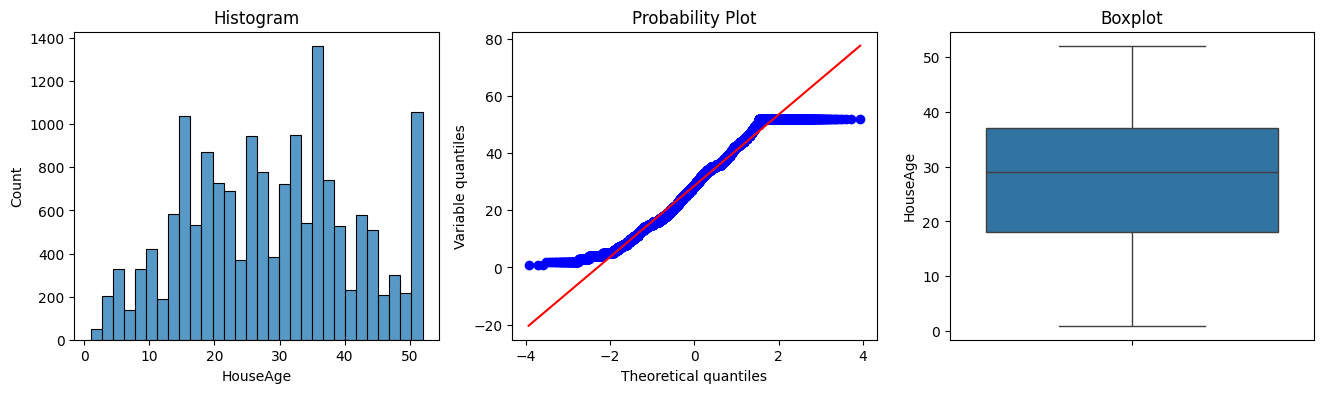

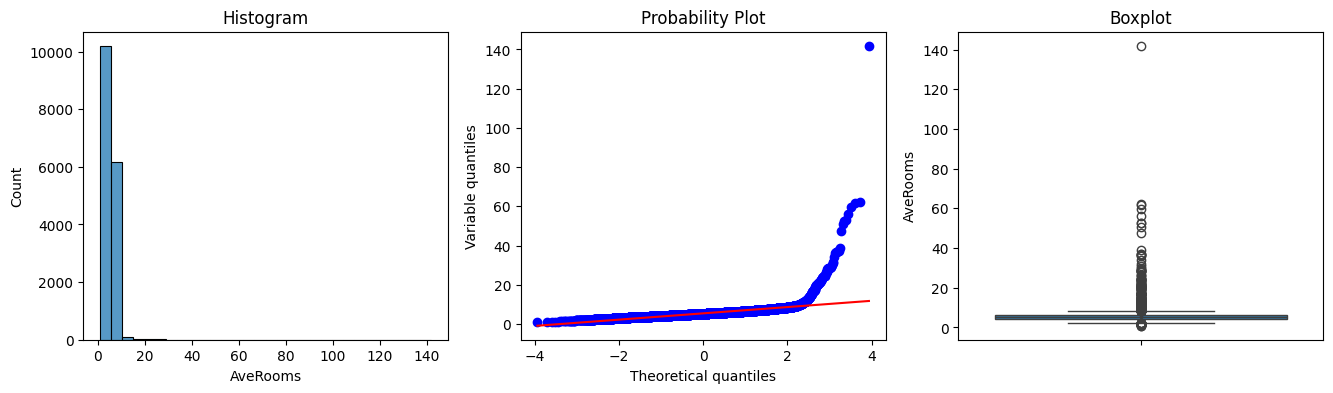

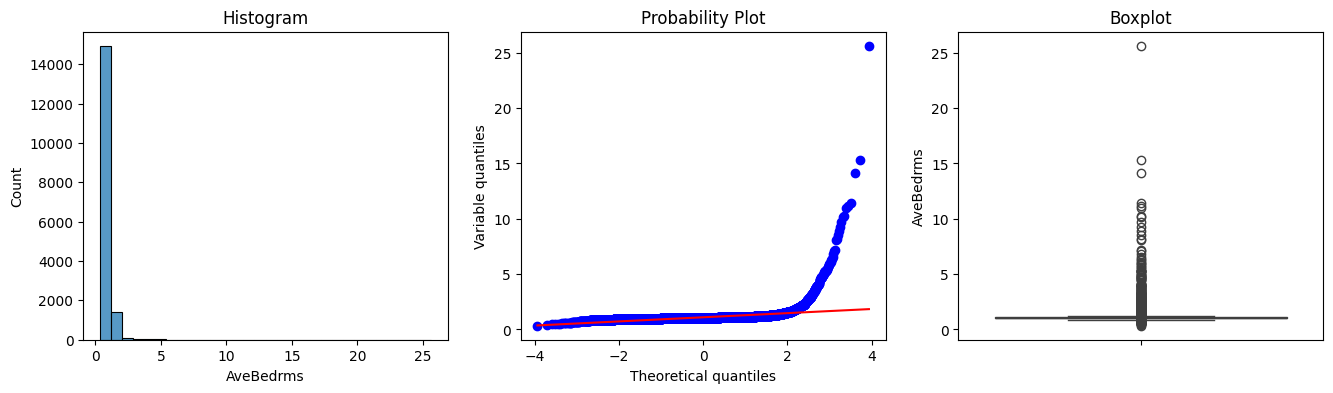

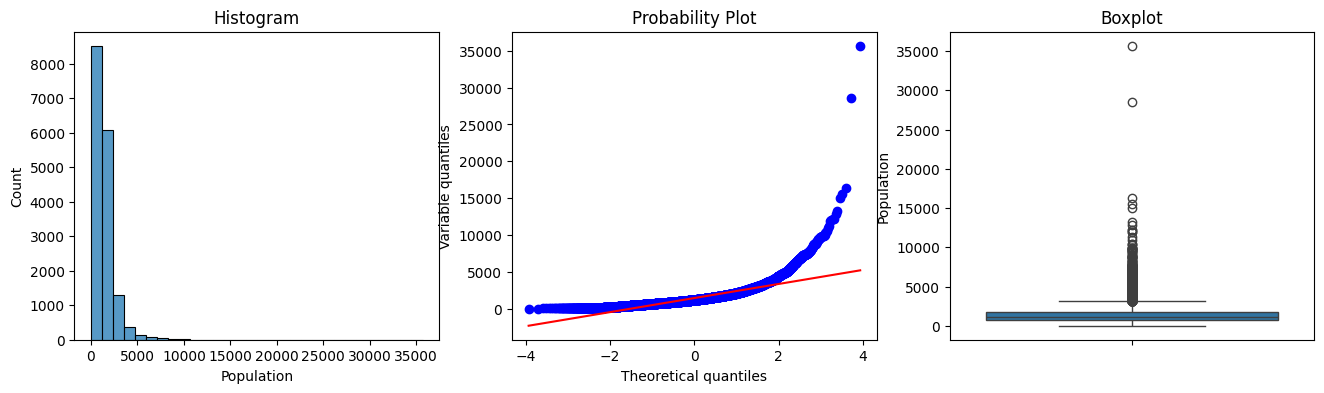

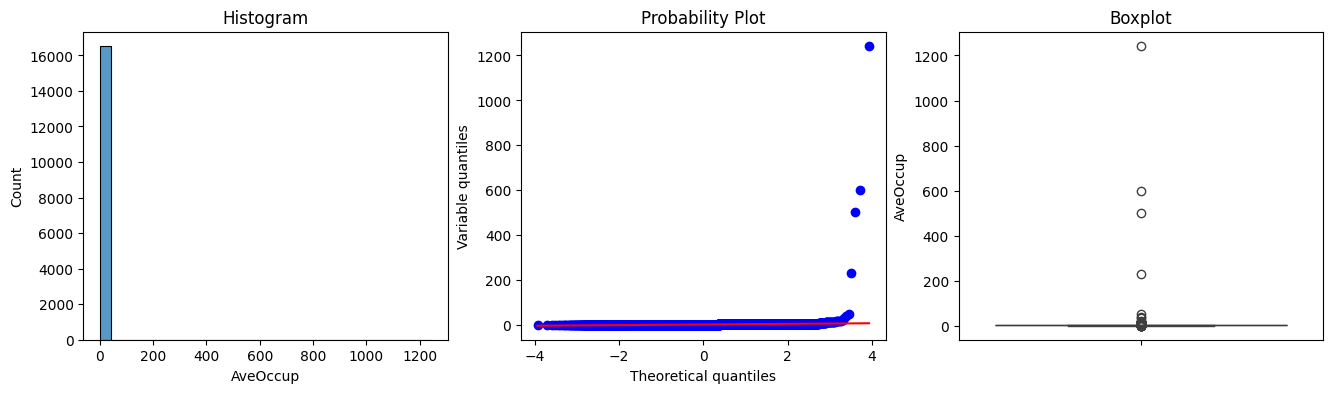

In [27]:
# memvisualisasikan outlier di LSTAT dengan Loop
for column in columns_to_check:
    check_plot(train_house, column)

From the above results, in my opinion we can conclude:
High level of outliers  for column: Average Rooms, Average Bedrooms, Population **bold text**

**Assignment 1.a Methode 2 Dengan Loop:**

In [18]:
# Assignment 1.a : lakukan looping untuk melihat plot distribusi data dan outlier pada kolom-kolom : ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup'] di california_dataset.csv
# Daftar nama kolom yang ingin Anda cek
# Function to identify outliers using IQR
columns_to_check = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

def identify_outlier(column):
    Q1 = train_house[column].quantile(0.25)
    Q3 = train_house[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train_house[(train_house[column] < lower_bound) | (train_house[column] > upper_bound)]
    return outliers

# Loop through every column to identify outliers
for column in columns_to_check:
    outliers = identify_outlier(columns_to_check)

# Print
    if not outliers.empty:
        print(f"Outliers in {column}:")
        print(outliers)
    else:
        print(f"No outliers found in {column}")


Streaming output truncated to the last 5000 lines.
18484       NaN        NaN          NaN  
6578        NaN        NaN          NaN  
13862       NaN        NaN          NaN  
2799        NaN        NaN          NaN  
4306        NaN        NaN          NaN  
14775       NaN        NaN          NaN  
17767       NaN        NaN          NaN  
19413       NaN        NaN          NaN  
18174       NaN        NaN          NaN  
7244        NaN        NaN          NaN  
298         NaN        NaN          NaN  
19418       NaN        NaN          NaN  
9241        NaN        NaN          NaN  
6770        NaN        NaN          NaN  
3823        NaN        NaN          NaN  
16858       NaN        NaN          NaN  
7977        NaN        NaN          NaN  
11463       NaN        NaN          NaN  
2035        NaN        NaN          NaN  
4039        NaN        NaN      5.00001  
10450       NaN        NaN      5.00001  
16737       NaN        NaN          NaN  
12117       NaN        Na

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



        MedInc  HouseAge    AveRooms  AveBedrms  Population     AveOccup  \
14196      NaN       NaN         NaN        NaN         NaN          NaN   
8267       NaN       NaN         NaN        NaN         NaN          NaN   
17445      NaN       NaN         NaN        NaN         NaN          NaN   
14265      NaN       NaN         NaN        NaN         NaN          NaN   
2271       NaN       NaN         NaN        NaN         NaN          NaN   
17848      NaN       NaN         NaN        NaN         NaN          NaN   
6252       NaN       NaN         NaN        NaN         NaN          NaN   
9389       NaN       NaN         NaN        NaN         NaN          NaN   
6113       NaN       NaN         NaN        NaN         NaN          NaN   
6061       NaN       NaN         NaN        NaN      9427.0          NaN   
16030      NaN       NaN         NaN        NaN         NaN          NaN   
8364       NaN       NaN         NaN        NaN         NaN          NaN   
9448       N

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



        MedInc  HouseAge    AveRooms  AveBedrms  Population     AveOccup  \
14196      NaN       NaN         NaN        NaN         NaN          NaN   
8267       NaN       NaN         NaN        NaN         NaN          NaN   
17445      NaN       NaN         NaN        NaN         NaN          NaN   
14265      NaN       NaN         NaN        NaN         NaN          NaN   
2271       NaN       NaN         NaN        NaN         NaN          NaN   
17848      NaN       NaN         NaN        NaN         NaN          NaN   
6252       NaN       NaN         NaN        NaN         NaN          NaN   
9389       NaN       NaN         NaN        NaN         NaN          NaN   
6113       NaN       NaN         NaN        NaN         NaN          NaN   
6061       NaN       NaN         NaN        NaN      9427.0          NaN   
16030      NaN       NaN         NaN        NaN         NaN          NaN   
8364       NaN       NaN         NaN        NaN         NaN          NaN   
9448       N

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



        MedInc  HouseAge    AveRooms  AveBedrms  Population     AveOccup  \
14196      NaN       NaN         NaN        NaN         NaN          NaN   
8267       NaN       NaN         NaN        NaN         NaN          NaN   
17445      NaN       NaN         NaN        NaN         NaN          NaN   
14265      NaN       NaN         NaN        NaN         NaN          NaN   
2271       NaN       NaN         NaN        NaN         NaN          NaN   
17848      NaN       NaN         NaN        NaN         NaN          NaN   
6252       NaN       NaN         NaN        NaN         NaN          NaN   
9389       NaN       NaN         NaN        NaN         NaN          NaN   
6113       NaN       NaN         NaN        NaN         NaN          NaN   
6061       NaN       NaN         NaN        NaN      9427.0          NaN   
16030      NaN       NaN         NaN        NaN         NaN          NaN   
8364       NaN       NaN         NaN        NaN         NaN          NaN   
9448       N

### Assignment 1.b
1. Lakukan handling outlier pilih 1 kolom saja yang di handling dengan IQR setelah mengecek distribusinya
2. Dan cek distribusinya kembali

In [29]:
### Assignment 1.b Lakukan handling outlier pilih 1 kolom saja yang di handling dengan IQR setelah mengecek distribusinya
### Dan cek distribusinya kembali
### columns_to_check = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
def find_outlier_boundary(df, variable):

    # Mari kita hitung batas luar yang merupakan outlier

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

# batas untuk LSTAT

MedianIncome_upper_limit, MedianIncome_lower_limit = find_outlier_boundary(train_house, 'MedInc')
MedianIncome_upper_limit, MedianIncome_lower_limit

(8.0828875, -0.7430125000000003)

In [30]:
### Re-Check the statistics
train_house['MedInc'].describe()

count    16512.000000
mean         3.880754
std          1.904294
min          0.499900
25%          2.566700
50%          3.545800
75%          4.773175
max         15.000100
Name: MedInc, dtype: float64

In [ ]:
# Melakukan loop untuk mengecek distribusi tiap kolom
# Loop through every column to identify outliers
columns_to_check = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

for column in columns_to_check:
    outliers = identify_outlier(columns_to_check)


# C. Missing Value Handling
Missing Value Merupakan nilai yang hilang di suatu kolom, namun tidak hanya sebatas itu. Untuk nilai yang tidak sesuai tapi muncul didalam suatu kolom tertentu juga bisa dianggap sebagai missing value. Misal tipenya kategorikal tapi isinya ada yang berupa angka dan juga sebaliknya.

In [31]:
df_company = pd.read_csv('/content/company.csv')

### Aturan missing value handling :
1. jika tipe datanya itu **numerik** -> handling menggunakan **median** (robust / tahan terhadap outlier)
2. jika tipe datanya itu **kategorik / object / string** -> handling menggunakan **mode / modus**

In [32]:
from sklearn.model_selection import train_test_split
#Splitting terlebih dahulu

from sklearn.model_selection import train_test_split
train_company, test_company = train_test_split(df_company, test_size = 0.2, random_state=42)

#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)

## Assignment 2. Missing Value Handling :
1. Cek persentase missing value pada kolom Headquarters di company.csv, Cek jenis missing valuenya ?
2. apakah di drop atau tidak (gunakan syarat drop kolom jika > 20%)
3. jika tidak maka handling, dan dengan cara apa handling nilainya, median atau modus ?

In [36]:
#Tulis jawaban missing value handling kolom Headquarters disini
df_company.isna().sum()




Revenue         0
Size            0
Rating          0
Headquarters    0
dtype: int64

In [41]:
for column in df_company.columns:
    print(f"============= {column} =================")
    display(df_company[column].value_counts())
    print()

============= Revenue =================


Unknown / Non-Applicable            213
$100 to $500 million (USD)           94
$10+ billion (USD)                   63
$2 to $5 billion (USD)               45
$10 to $25 million (USD)             41
$1 to $2 billion (USD)               36
$25 to $50 million (USD)             36
$50 to $100 million (USD)            31
$1 to $5 million (USD)               31
-1                                   27
$500 million to $1 billion (USD)     19
$5 to $10 million (USD)              14
Less than $1 million (USD)           14
$5 to $10 billion (USD)               8
Name: Revenue, dtype: int64


============= Size =================


51 to 200 employees        135
1001 to 5000 employees     104
1 to 50 employees           86
201 to 500 employees        85
10000+ employees            80
501 to 1000 employees       77
5001 to 10000 employees     61
-1                          27
Unknown                     17
Name: Size, dtype: int64


============= Rating =================


 3.5    58
-1.0    50
 4.0    41
 3.3    41
 3.9    40
 3.8    39
 3.7    38
 5.0    36
 4.5    32
 3.6    31
 3.4    31
 4.2    29
 4.1    25
 4.4    24
 4.7    22
 3.2    21
 4.8    20
 4.3    14
 2.9    14
 4.6    12
 3.1    12
 4.9    11
 2.7    10
 3.0     7
 2.6     4
 2.8     3
 2.5     2
 2.2     1
 2.4     1
 2.3     1
 2.1     1
 2.0     1
Name: Rating, dtype: int64


============= Headquarters =================


New York, NY                 33
-1                           31
San Francisco, CA            31
Chicago, IL                  23
Boston, MA                   19
Reston, VA                   14
Mc Lean, VA                  13
Westminster, CO              12
Cambridge, United Kingdom    10
Cambridge, MA                10
Vienna, VA                    8
Denver, CO                    7
Herndon, VA                   7
Washington, DC                7
Woodbine, MD                  7
Saint Louis, MO               7
Bedford, MA                   7
Arlington, VA                 7
San Jose, CA                  7
San Antonio, TX               6
Mountain View, CA             6
Basel, Switzerland            6
San Rafael, CA                6
Chantilly, VA                 6
Fairfax, VA                   5
Houston, TX                   5
Pittsburgh, PA                5
Bethesda, MD                  5
Rockville, MD                 5
Los Angeles, CA               5
Springfield, MA               5
Bellevue

In [39]:
df_company.describe()

Rating
count  672.000000
mean     3.518601
std      1.410329
min     -1.000000
25%      3.300000
50%      3.800000
75%      4.300000
max      5.000000

from matplotlib import pyplot as plt
_df_0['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Rating', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [46]:
100 * len(df_company[df_company['Rating']==-1]) / len(df_company)
100 * len(df_company[df_company['Size'].isin(['-1','Unknown'])]) / len(df_company)
100 * len(df_company[df_company['Revenue'].isin(['-1','Unknown / Non-Applicable'])]) / len(df_company)

35.714285714285715

In [45]:
# Fungsi untuk menghitung persentase missing value
def missing_percentage(column):
    total_values = len(df_company[column])
    missing_values = df_company[column].isna().sum()
    percentage = (missing_values / total_values) * 100
    return percentage

# Looping untuk tiap column
for column in df_company.columns:
    percentage = missing_percentage(column)
    print(f"Percentage of missing values in {column}: {percentage:.2f}%")

Percentage of missing values in Revenue: 0.00%
Percentage of missing values in Size: 0.00%
Percentage of missing values in Rating: 0.00%
Percentage of missing values in Headquarters: 0.00%


# D. Encoding
Definisi : Mengubah tipe kategorikal menjadi numerikal dengan pendekatan aturan encoding untuk persiapan sebelum dilakukannya machine learning modelling. Teknik Encoding yang umum dipakai :
1. One Hot Encoding (OHE) : Lakukan pada kolom gender
2. Label Encoding / Ordinal Encoding : Lakukan pada kolom Yes dan No, Jika Yes menjadi 1 , Jika No menjadi 0. Sebagai Contohnya di kolom  Partner, Dependents.
3. Mean Encoding : Contract

In [83]:
df_churn = pd.read_csv('/content/Telco-Customer-Churn.csv')

In [84]:
#Splitting terlebih dahulu
train_churn, test_churn = train_test_split(df_churn, test_size = 0.2, random_state = 42)

**D.1a Option1: One Hot Encoding (OHE) : Lakukan pada kolom gender**

In [85]:
encode_ohe = ['gender'] #buat list nama-nama kolom yang ingin dilakukan OHE
train_churn = pd.get_dummies(train_churn, columns=encode_ohe)
test_churn = pd.get_dummies(test_churn, columns=encode_ohe)

In [86]:
train_churn.head()

customerID  SeniorCitizen Partner Dependents  tenure PhoneService  \
2142  4223-BKEOR              0      No        Yes      21          Yes   
1623  6035-RIIOM              0      No         No      54          Yes   
6074  3797-VTIDR              0     Yes         No       1           No   
1362  2568-BRGYX              0      No         No       4          Yes   
6754  2775-SEFEE              0      No        Yes       0          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
2142                No             DSL            Yes           No   
1623               Yes     Fiber optic             No          Yes   
6074  No phone service             DSL             No           No   
1362                No     Fiber optic             No           No   
6754               Yes             DSL            Yes          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
2142              Yes          No          No             Yes        One year   
1623               No          No         Yes             Yes        Two year   
6074               No          No          No              No  Month-to-month   
1362               No          No          No              No  Month-to-month   
6754               No         Yes          No              No        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
2142               No               Mailed check           64.85       1336.8   
1623              Yes  Bank transfer (automatic)           97.20      5129.45   
6074              Yes           Electronic check           23.45        23.45   
1362              Yes           Electronic check           70.20       237.95   
6754              Yes  Bank transfer (automatic)           61.90                

     Churn  gender_Female  gender_Male  
2142    No              1            0  
1623    No              1            0  
6074   Yes              0            1  
1362   Yes              0            1  
6754    No              0            1

## Assignment 3.a Label Encoder :
1. Pilih kolom-kolom StreamingMovies, StreamingTV, TechSupport, DeviceProtection, OnlineBackup, OnlineSecurity, MultipleLines
2. Ganti nilai yang tidak sesuai : No internet service menjadi No lalu validasi dengan value_counts
3. Kemudian lakukan label Encoder
4. Notes : gunakan Telco-Customer-Churn.csv

In [88]:
#Tulis jawaban
from sklearn.preprocessing import LabelEncoder
# Kolom-kolom yang ingin di-label encode
columns_to_encode = ['StreamingMovies', 'StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'MultipleLines']

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

In [89]:
# Menerapkan label encoding ke data pelatihan (train)
for col in columns_to_encode:
    train_churn[col] = label_encoder.fit_transform(train_churn[col])
#fit dilakukan di data train dan implementasikan ke train, kemudian lakukan transform ke data test. Untuk mencegah data leakage

In [90]:
# Menerapkan label encoding yang sama ke data uji (test)
for col in columns_to_encode:
    test_churn[col] = label_encoder.fit_transform(test_churn[col])

In [91]:
train_churn.head()

customerID  SeniorCitizen Partner Dependents  tenure PhoneService  \
2142  4223-BKEOR              0      No        Yes      21          Yes   
1623  6035-RIIOM              0      No         No      54          Yes   
6074  3797-VTIDR              0     Yes         No       1           No   
1362  2568-BRGYX              0      No         No       4          Yes   
6754  2775-SEFEE              0      No        Yes       0          Yes   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
2142              0             DSL               2             0   
1623              2     Fiber optic               0             2   
6074              1             DSL               0             0   
1362              0     Fiber optic               0             0   
6754              2             DSL               2             2   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
2142                 2            0            0                2   
1623                 0            0            2                2   
6074                 0            0            0                0   
1362                 0            0            0                0   
6754                 0            2            0                0   

            Contract PaperlessBilling              PaymentMethod  \
2142        One year               No               Mailed check   
1623        Two year              Yes  Bank transfer (automatic)   
6074  Month-to-month              Yes           Electronic check   
1362  Month-to-month              Yes           Electronic check   
6754        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  gender_Female  gender_Male  
2142           64.85       1336.8    No              1            0  
1623           97.20      5129.45    No              1            0  
6074           23.45        23.45   Yes              0            1  
1362           70.20       237.95   Yes              0            1  
6754           61.90                 No              0            1

In [63]:
test_churn.head()

customerID  SeniorCitizen Partner Dependents  tenure PhoneService  \
185   1024-GUALD              0     Yes         No       1           No   
2715  0484-JPBRU              0      No         No      41          Yes   
3825  3620-EHIMZ              0     Yes        Yes      52          Yes   
1807  6910-HADCM              0      No         No       1          Yes   
132   8587-XYZSF              0      No         No      67          Yes   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
185               1             DSL               0             0   
2715              2              No               1             1   
3825              0              No               1             1   
1807              0     Fiber optic               0             0   
132               0             DSL               0             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
185                  0            0            0                0   
2715                 1            1            1                1   
3825                 1            1            1                1   
1807                 2            0            0                0   
132                  0            2            0                0   

            Contract PaperlessBilling              PaymentMethod  \
185   Month-to-month              Yes           Electronic check   
2715  Month-to-month              Yes  Bank transfer (automatic)   
3825        Two year               No               Mailed check   
1807  Month-to-month               No           Electronic check   
132         Two year               No  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  gender_Female  gender_Male  
185            24.80         24.8   Yes              1            0  
2715           25.25       996.45    No              0            1  
3825           19.35       1031.7    No              1            0  
1807           76.35        76.35   Yes              1            0  
132            50.55       3260.1    No              0            1

## 3.b Assignment Mean Encoding
1. Lakukan kolom Mean Encoding pada InternetService

In [77]:
#Count Unique values in column 'Internet Service'
unique_values = df_churn['InternetService'].unique()
print(f"Unique values in 'ColumnA': {unique_values}")

Unique values in 'ColumnA': ['DSL' 'Fiber optic' 'No']


In [79]:
df_churn['InternetService'].head(20)

0             DSL
1             DSL
2             DSL
3             DSL
4     Fiber optic
5     Fiber optic
6     Fiber optic
7             DSL
8     Fiber optic
9             DSL
10            DSL
11             No
12    Fiber optic
13    Fiber optic
14    Fiber optic
15    Fiber optic
16             No
17    Fiber optic
18            DSL
19    Fiber optic
Name: InternetService, dtype: object

In [94]:
df_churn['Churn'].head(20)

0      No
1      No
2     Yes
3      No
4     Yes
5     Yes
6      No
7      No
8     Yes
9      No
10     No
11     No
12     No
13    Yes
14     No
15     No
16     No
17     No
18    Yes
19     No
Name: Churn, dtype: object

In [104]:
# Encode Churn for Yes to "1" and No to "0" to ease the mapping
train_churn['Churn_binary'] = train_churn['Churn'].replace({'Yes': 1, 'No': 0})

In [108]:
dict_internetservice = train_churn.groupby(['InternetService'])['Churn_binary'].mean().to_dict()

dict_internetservice

{'DSL': 0.1918514698298092,
 'Fiber optic': 0.41555824264409513,
 'No': 0.07660626029654036}

Summary from above:
1. DSL memiliki rata-rata tingkat Churn sekitar **19.18%**, yang berarti sekitar 19.18% dari Customer dengan kategori Churn.
2. Fiber Optic memiliki rata-rata tingkat Churn sekitar **41.55%**
3. No  memiliki rata-rata tingkat Churn sekitar **7.66%**

In [107]:
# Function to perform mean encoding
def mean_encode(df, cat_column, target_column):
    mean_encoding_map = df.groupby(cat_column)[target_column].mean()
    df[f'{cat_column}_mean_encoded'] = df[cat_column].map(mean_encoding_map)
    return df

# Apply mean encoding to the 'InternetService' column
train_churn_encoded = mean_encode(train_churn, 'InternetService', 'Churn_binary')

# Display the original and mean-encoded DataFrames
print("Original DataFrame:")
print(train_churn)
print("\nMean-Encoded DataFrame:")
print(train_churn_encoded)

Streaming output truncated to the last 5000 lines.
4828             0                      0.191851  
2629             1                      0.415558  
3341             0                      0.191851  
564              0                      0.191851  
1224             1                      0.191851  
142              0                      0.415558  
3942             1                      0.191851  
2271             0                      0.415558  
2531             0                      0.076606  
2004             1                      0.415558  
1194             0                      0.191851  
6965             0                      0.415558  
1756             0                      0.191851  
497              0                      0.076606  
3477             0                      0.415558  
6885             1                      0.415558  
3315             0                      0.415558  
721              0                      0.076606  
5118             0             

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Thank you :)